# Data & Apprentissage, M2CHPS 2021

## 2nd Lab Session

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse-2022.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse-2022.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Lab#.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Lab#.ipynb),
where '#' should be replaced by the number of the lab session. These notebooks are self-contained and hence have all the needed links to other resources.

Part of the scikit-learn material comes from its [online documentations and tutorial](https://scikit-learn.org/stable/modules/linear_model.html).

## Table of Contents

0. <a href="#0.-Before-you-start">Before you start</a>
1. <a href="#1.-Generalized-Linear-Models">Generalized Linear Models</a>
2. <a href="#2.-Linear-Regression">Linear-Regression</a>
3. <a href="#3.-Robust-Linear-Regression">Robust Linear Regression</a>
4. <a href="#4.-Ridge-Regression">Ridge Regression</a>
5. <a href="#5.-Lasso">Lasso</a>
6. <a href="#6.-Reglarization-norms-in-optimization">Reglarization norms in optimization</a>
7. <a href="#7.-Underfitting-vs-Overfitting:-Example-in-Polynomial-Regression">Underfitting vs Overfitting: Example in Polynomial Regression</a>



# 0. Before you start

## What is git

Git is a free and open source platform for distributed versioning. It helps keeping track of changes in files that are updated in collaborative projects. 

For a basic intro to git and the available shells/interfaces, see this [git intro presentation](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/git_intro.pdf).

## What is Scikit-learn

[**Scikit-learn**](https://scikit-learn.org/) is a free and open-source Python library specialized in Machine Learning. It was initially a [*Google Summer of Code*](https://summerofcode.withgoogle.com/) project developed by David Cournapeau in 2007. Since then a lot of people have contributed, which helped a big shift in academia and industry towards favoring free and open source solutions against paid programming platforms (e.g. Matlab, SAS, and other statistical analysis platforms). Today it is still active in development and is considered the most popular means of putting hands on ML algorithms.

*How to install it?* It usually comes with Anaconda and the popular python installation packages. In case you miss it, you can find/fork it [here](https://github.com/scikit-learn/scikit-learn). Examples of applications using various ML methods can be found [here](https://scikit-learn.org/stable/auto_examples/index.html).

For a quick reference (cheet-sheet) see [here](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf).

## 1. Generalized Linear Models

GLM is a general family of methods for regression in which the target value is expected to be a linear combination of the features. Let $x=(x_1\dots x_p)^\top$ be a $p$-dimensional vector observation, then the predicted value of a model $\hat{y}$ is given by:

$\hat{y}(w, x) = w_0 + w_1 x_1 + \dots + w_p x_p$.

Next the vector of coefficients, or weights, $w = (w_1\dots w_p)$ is reffered to as ``coef_`` and the $w_0$ as ``intercept_``. Moreover, the data matrix $X$ is assumed such that to store multiple vector ovesrvations (like $x$ above) as columns, also $y$ is the vector of outputs for the data objects in $X$.

**Matrix formulation**

If we extend the data matrix $X$ with a dummy dimention equal to 1 for all the $n$ observations (sometimes called *design matrix*)

$X = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p}\\
&&\vdots\\
1 & x_{n1} & x_{n1} & \dots & x_{np}
\end{bmatrix},
$

and we consider $𝑤=(𝑤_0\ 𝑤_1…𝑤_𝑝)$ then we can rewrite in an elegant matrix form the linear regression problem as follows: 

$Y = Xw = \begin{bmatrix}
w_0 +  w_1 x_{11} + \dots + w_p x_{1p}\\
\vdots\\
w_0 +  w_1 x_{n1} + \dots + w_p x_{np}
\end{bmatrix}$.

**Note:** Linear regression can be used to perform classification. This is generally called: *logistic regression*.


## 2. Linear Regression

[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. The optimization problem behind it is of the form:

$\min_{w} ||X w - y||_2^2$.


`LinearRegression` will take in its ``fit`` method arrays $X$, $y$ and will store the coefficients $w$ of the linear model in its ``coef_`` member. 

Note: The least squares solution is computed using the singular value
decomposition (SVD) of $X$, which if that's of shape $N \times d$, then the complexity cost is in essence $O(N\,d)$. Depending on the relation of the magnitude between $N$ and $d$, one of the factors may be determinant of the the cost.

**Simple example with three input data objects**

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# The input data are three 2D points on the diagonal x_0=x_1, that give the output y: 
#    y = 1 * x_0 + 2 * x_1 + 3
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
                
# Show the coefficients that control the slope of the linear model - should be the diagonal
print(reg.coef_)

# Show the translation of the model on y-axis - should be "zero"
print(reg.intercept_)

[0.5 0.5]
2.220446049250313e-16


[**Application on a real dataset**](https://scikit-learn.org/stable/modules/linear_model.html)

In [4]:
# Import modules and libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the diabetes dataset (should come with your scikit installation)
diabetes = datasets.load_diabetes()

# Optionally inspect the dataset as python stored it in data structures
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [28]:
# Use only one feature
X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

print(diabetes.data.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(442, 10)
(442, 1)
(422, 1)
(20, 1)


In [29]:
X.shape

(442, 1)

In [30]:
# Create a "linear regression" object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


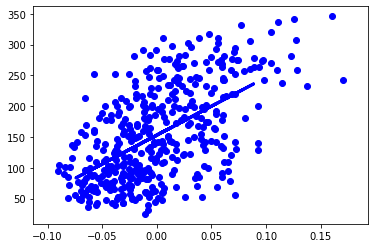

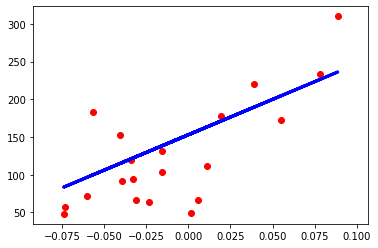

In [31]:
# Show results 

# The learned coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot the fit on the training data
plt.figure(1)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Plot outputs
plt.figure(2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

**Exercise**: pick the first 10 data points (objects) and start increasing (multiple time with step 50) their coordinate values. The points should appear higher in the y-axis of the plots. Then observe the efficiency of the linear regression. What can you comment?

## 3. Robust Linear Regression

Reading about the iterative method:
* [RANdom SAmple Consensus (RANSAC)](https://en.wikipedia.org/wiki/Random_sample_consensus) method for robust linear regression. 
* https://en.wikipedia.org/wiki/RANSAC
* ["Overview of the RANSAC Algorithm"](http://www.cse.yorku.ca/~kosta/CompVis_Notes/ransac.pdf), K.G. Derpanis. (2010).
* ["Performance Evaluation of RANSAC Family"](http://www.bmva.org/bmvc/2009/Papers/Paper355/Paper355.pdf), 
   Sunglok Choi, Taemin Kim and Wonpil Yu - BMVC (2009).

RANSAC fits a model using random subsets of inliers from the complete data set. It is a non-deterministic algorithm producing only a reasonable result with a certain probability, depending on the number of iterations. It is typically used for linear and non-linear regression problems and is especially popular in computer vision.

The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, which are e.g. caused by erroneous measurements or invalid hypotheses about the data. The resulting model is then estimated only from the determined inliers.

**Details of the algorithm**

Each iteration performs the following steps:

1. Select ``min_samples`` random samples from the original data and check
   whether the set of data is valid (see ``is_data_valid``).
2. Fit a model to the random subset (``base_estimator.fit``) and check
   whether the estimated model is valid (see ``is_model_valid``).
3. Classify all data as inliers or outliers by calculating the residuals
   to the estimated model (``base_estimator.predict(X) - y``) - all data
   samples with absolute residuals smaller than the ``residual_threshold``
   are considered as inliers.
4. Save fitted model as best model if number of inlier samples is
   maximal. In case the current estimated model has the same number of
   inliers, it is only considered as the best model if it has better score.

These steps are performed either a maximum number of times (``max_trials``) or
until one of the special stop criteria are met (see ``stop_n_inliers`` and
``stop_score``). The final model is estimated using all inlier samples (consensus
set) of the previously determined best model.

The ``is_data_valid`` and ``is_model_valid`` functions allow to identify and reject
degenerate combinations of random sub-samples. If the estimated model is not
needed for identifying degenerate cases, ``is_data_valid`` should be used as it
is called prior to fitting the model and thus leading to better computational
performance.

**Using Scikit-learn to apply RANSAC**

Here we are going to see an [application of RANSAC method](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html) on a toy dataset, using ready-to-use methods of the scikit-learn library. Recall that this will do exactly what you should achieve for Assignment 1.2 by implementing from scratch the algorithm.

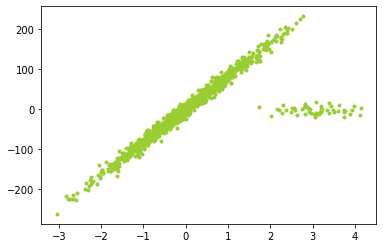

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

N_samples = 1000
N_outliers = 50

X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)

plt.scatter(X, y, color='yellowgreen', marker='.', label='Inliers')

**The whole example**

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


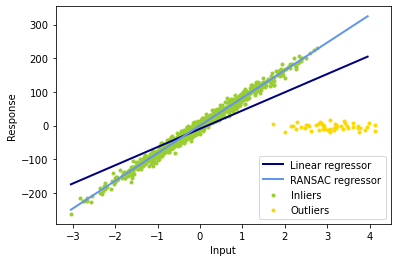

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

## 4. Ridge Regression

[`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) regression addresses some of the problems of `ordinary_least_squares` by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$.


The complexity parameter $\alpha \geq 0$ (most of times however is denoted by $\lambda$ and is called *penalty weight*) controls the amount of *shrinkage*: the larger the value of $\alpha$, the greater the amount of shrinkage, and thus the coefficients become smaller in value, and as a result they become also more robust to *collinearity*.

The computational complexity of ridge regression has the same order as the ordinary least squares, therefore: $O(N\,d)$.

**Simple example**

In [34]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

# Setup the model by specifying the alpha penalty value
reg = linear_model.Ridge(alpha=.5)

# Fit to toy data
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

# Show all model parameters
reg

# Show the learned coefficients and intercept
print(reg.coef_)
print(reg.intercept_)


[0.34545455 0.34545455]
0.1363636363636364


[**Plot Ridge coefficients as a function of the regularization**](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-download-auto-examples-linear-model-plot-ridge-path-py)

This example:

* Shows the effect of variable *collinearity* (i.e. in simple words: *high dependence*) in the coefficients of a ridge regression estimator. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter (recall: bigger $\alpha$ means more intense regularization).

* Shows the usefulness of applying ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization ($\alpha$) to reduce this variation (noise).

* When $\alpha$ is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends toward the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix: X_ij = 1 / (i+j-1)
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# show the data matrix
print(X)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

In [3]:
# Compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

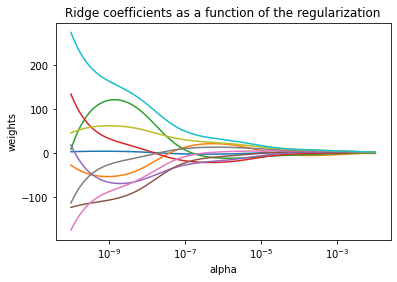

In [4]:
# Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse x-axis if you prefer

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

**Setting the regularization parameter: generalized Cross-Validation**

`RidgeCV` implements ridge regression with built-in cross-validation (CV) of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV), an efficient form of *leave-one-out cross-validation* (all data objects are in the training set, but one which is left out as test set; the procedure repeats so that all data objects to be the test set once).

In [38]:
# Example
import numpy as np
from sklearn import linear_model

reg = linear_model.RidgeCV(np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
   
print(reg.coef_)
print(reg.intercept_)
print('Best alpha: ', reg.alpha_)

[0.47146402 0.47146402]
0.05235732009923899
Best alpha:  0.01


## 5. Lasso

The `Lasso` is a linear model that estimates *sparse* coefficients. It is useful in some contexts due to its tendency to prefer solutions
with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason,
Lasso and its variants are fundamental to the field of Compressed Sensing. Under certain conditions, it can recover the exact set of non-zero coefficients.

The underlying linear model is written as the following objective function:

  $\min_{w} { \frac{1}{2N} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$.

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added as regularization term, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1$-norm of the coefficient vector (see the difference with the $\ell_2$-norm used by ridge regression).

The standard implementation of the `Lasso` class uses the coordinate descent optimization algorithm to fit the coefficients. There are of course other alternatives.

Note: Since lasso returns a sparse solution, meaning that it indicates weights almost zero for many features, it can be straightforwardly used as a feature selection method.


**Simple example**

In [39]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])  

reg.predict([[1, 1]])

array([0.8])

**Lasso model selection using Cross-Validation**

Use the *Akaike information criterion* (AIC), the *Bayes Information criterion* (BIC) and cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

$\text{AIC} = 2k - 2ln(\hat{L})$

$\text{BIC} = k\cdot ln(n) - 2ln(\hat{L})$

In the above, $k$ is the number of model parameters, $\hat{L}$ is the highest likelihood found by a $k$-parameter model, and $n$ is the number of datapoints (only used by BIC, which means that the result is true only for the specific size of data).

Results obtained with LassoLarsIC are based on AIC/BIC criteria.

Information-criterion based model selection: It is very fast, but it relies on a proper estimation of degrees of freedom, are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples).

Cross-validation:, we use 20-fold with 2 algorithms to compute the Lasso path: *coordinate descent* (`LassoCV` class), and *least angle regression* (`Lars`, as implemented by the `LassoLarsCV` class). Both algorithms give roughly the same results. They have however different execution speed and sources of numerical errors.

`Lars` computes a path solution only for each kink (i.e. suden change indicated by an increase/decrease of the gradient) in the path of the improving solutions. As a result, it is very efficient when there are only of few kinks, which is the case if there are few features or samples. Also, it is able to compute the full path without setting any meta-parameter. 

On the opposite, coordinate descent computes the path points on a pre-specified grid (here we use the default). Thus it is more efficient if the number of grid points is smaller than the number of kinks in the path. Such a strategy can be interesting if the number of features is really large and there are enough samples to select a large amount. In terms of numerical errors, for heavily correlated variables, Lars will accumulate more errors, while the coordinate descent algorithm will only sample the path on a grid.

Note how the optimal value of alpha varies for each fold. This illustrates why nested-cross validation is necessary when trying to evaluate the performance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for unseen data.

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.029s)')

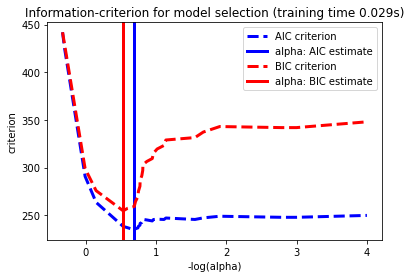

In [3]:
# LassoLarsIC: least angle regression with BIC/AIC criterion
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3, label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

Computing regularization path using the coordinate descent lasso...


(2300.0, 3800.0)

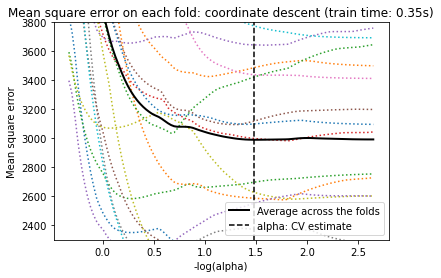

In [4]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k', label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent (train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

## 6. Reglarization norms in optimization

First, let's see the forms of the norms $||x||_p$ and what they impose to an input vector $x \in \mathbb{R}^2$: 

![l1vsl2norms2](http://kalogeratos.com/MyCourses/DML-M2HPC/l1vsl2norms_2.png)

Lasso, Ridge, or other sorts of regression formulations inherit problems from the nature of the norm they intergrate as penalty term (note that modern approaches may include both $\ell_1$ and $\ell_2$:

**$\ell_0$:** the desired target for sparsity, but technically non-treatable.

**$\ell_1$:** a relaxation that we can hope to impose sparisty; difficult to treat technically; robust to outliers but unstable solutions.

**$\ell_2$:** non-sparse solutions, only *shrinked*; easy to treat technically with efficient optimization techniques; sensitive to outliers but stable solutions.

![l1vsl2norms3](http://kalogeratos.com/MyCourses/DML-M2HPC/l1vsl2norms_3.png)




## 7. [Underfitting vs Overfitting: Example in Polynomial Regression](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

**Underfitting:** is when the model is not sufficient to fit the training samples. 

**Good-fitting:** is when the model is sufficient to capture or describe the data. A polynomial of degree 4 approximates the true function of the following example almost perfectly. 

**Overfitting:** is when the model over-complexifies the problem and produces a more complex solution that the one underlying the data. This case appears in the third and right-most plot below.

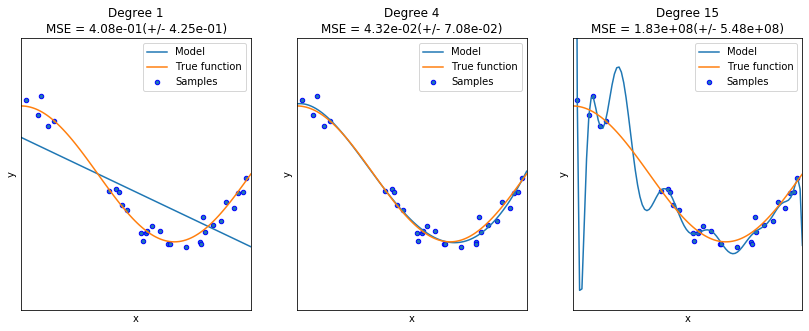

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()